# Customer Segmentation Report for Arvato Financial Services

Nowaday customer segmentation has a key role in datadriven companies. It allows a business to precisely reach a consumer with specific needs and wants. In the long term, this benefits the company, because they are able to use their corporate resources more effectively and make better strategic marketing decisions.

This project relies on identifying key differentiators using unsupervised techniques that divide customers into groups that can be targeted. Information such as a customers demographics (age, race, religion, gender, family size, ethnicity, income, education level), geography (where they live and work), psychographic (social class, lifestyle and personality characteristics) and behavioral (spending, consumption, usage and desired benefits) tendencies are taken into account when determining customer segmentation practices.
We will use Principal Components Analysis (PCA) and K-means Clustering to simplify and describe the relationship between the demographics of the company's existing customers and the general geographical population of Germany.

After dimensionality reduction and clustering we’ll build our model regarding the supervised data provided. The goal in this section is to create a binary classifier model. This model will be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

Principal Component Analysis (PCA) reduce the dimensionality of the general data. Then, we use K-means clustering to group customers to a particular cluster based on demograpics and behavioral characteristics in component space.
Each cluster tells us how customers are similar and which characteristics create this similarity in component space. 

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

This project is composed of two parts and each dataset is used as follows:

**1 - Customer Segmentation Report (unsupervised learning):**

    • Udacity_AZDIAS_052018.csv: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns)
    • Udacity_CUSTOMERS_052018.csv: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns)

The general population dataset (AZDIAS) will be used to create our unsupervised model (PCA and K-means). Then customers dataset will be mapped into the model in order to identify patterns and relation between customers groups.

**2 - Supervised Learning Model:**

    • Udacity_MAILOUT_052018_TRAIN.csv: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns)
    • Udacity_MAILOUT_052018_TEST.csv: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Before implementing our supervised model, the same steps are applied (part one) to the train dataset. After that we train our binary classifier to create a benchmark, then our target model. Different metrics will be used to evaluate our model. 

## Part 1: Customer Segmentation Report

Despite the extensive literature on market segmentation, there is no overall
consensus about the optimal segmentation methodology. One reason for this
diversity is the fact that segmentation can be observed from different
perspectives.

The challenge in the first part of this project is aimed at making use of machine
learning techniques in grouping customers regarding their demographics
characteristics and secondly try to group them regarding their geographical
location in Germany.

In this section, the main subjects are divided as follows:

1. Data Exploration
2. Cleaning the data
3. Principle Component Analysis (PCA)
4. Cluster Analysis


### 1- Data Exploration

Data exploration is a key step in data analysis before initiating any machine learnng technique and it is not possible to achieve effective results without having enough knowledge about the data. Before using data, we must explore some data characteristics like shape, size, feature description and data type. Moreover it is necessary to analyze the data before applying machine learning techniques. There are some data analysis tools that facilitate this procedure. In the following code, we present some of these techniques that were applied to explore our data. 

In [35]:
# load in the data
azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
azdias.info()#Demographics data for the general population of Germany

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(6)
memory usage: 2.4+ GB


In [4]:
customers.info()#Demographics data for customers of a mail-order company

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Columns: 369 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(94), object(8)
memory usage: 539.5+ MB


In [5]:
print ('azdias dataset contains {} rows and {} columns'.format(azdias.shape[0],azdias.shape[1]))
print ('customers dataset contains {} rows and {} columns'.format(customers.shape[0],customers.shape[1]))

azdias dataset contains 891221 rows and 366 columns
customers dataset contains 191652 rows and 369 columns


##### I. Additional columns for customers dataframe

In [6]:
# Additional columns for customers dataframe
list(set(customers.columns) - set(azdias.columns))

['CUSTOMER_GROUP', 'PRODUCT_GROUP', 'ONLINE_PURCHASE']

In [7]:
customers[['PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE']].tail()

,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE
191647,COSMETIC_AND_FOOD,MULTI_BUYER,0
191648,COSMETIC,SINGLE_BUYER,0
191649,COSMETIC_AND_FOOD,MULTI_BUYER,0
191650,FOOD,SINGLE_BUYER,0
191651,COSMETIC_AND_FOOD,MULTI_BUYER,0


##### II. Sort dataframe  and Set index to LNR column

In [8]:
customers = customers.sort_values('LNR')
azdias = azdias.sort_values('LNR')

In [9]:
# Set LNR columns as index
customers = customers.set_index('LNR')
azdias = azdias.set_index('LNR')

In [10]:
azdias.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
191653,-1,9.0,0.0,NaN,NaN,NaN,NaN,NaN,14.0,0.0,...,1.0,10.0,12.0,9.0,6.0,9.0,5.0,3,2,4
191654,-1,6.0,20.0,NaN,NaN,NaN,NaN,20.0,2.0,0.0,...,1.0,6.0,9.0,9.0,6.0,4.0,7.0,5,2,3
191655,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1
191656,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3
191657,3,1.0,12.0,NaN,NaN,NaN,NaN,12.0,9.0,0.0,...,4.0,5.0,7.0,4.0,NaN,9.0,2.0,4,2,3


##### III. Exploring data attributes

In this section we want to compare attributes dataframe (DIAS Attributes - Values 2017.xlsx) and information dataframe (DIAS Information Levels - Attributes 2017.xlsx) with customers data (Udacity_CUSTOMERS_052018.csv) and thereafter we want to have a look at description of each attribute. To extract each description we iterate over each dataframe using their intersections. At the end of this part we should have a good overview of the features and thrit description.

In [11]:
attributes = pd.read_excel('DIAS Attributes - Values 2017.xlsx')
information = pd.read_excel('DIAS Information Levels - Attributes 2017.xlsx')

In [12]:
# Dropping the first useless column 
attributes = attributes.drop(attributes.columns[0], axis=1)
information = information.drop(information.columns[0], axis=1)

##### IV. First level of information

In [13]:
level = information[['Information level']].astype(str)

In [14]:
# General groups of attributes
general_groups = level[level.values != 'nan'].reset_index(drop=True)

In [15]:
general_groups

,Information level
0,Person
1,Household
2,Building
3,Microcell (RR4_ID)
4,Microcell (RR3_ID)
5,125m x 125m Grid
6,Postcode
7,RR1_ID
8,PLZ8
9,Community


In [16]:
# Dropping rows with  NaN values
attributes = attributes.dropna(axis=0)

In [17]:
# Intersection between customers dataframe and attributes dataframe
intersection_attributes = list(set(customers.columns).intersection(attributes.Attribute))

In [18]:
print ('The customers dataframe attributes are described as follows: \n')
for i in intersection_attributes:
    
    print ('{} : {}'.format(i,attributes[attributes['Attribute']== i]['Description'].values[0]))

The customers dataframe attributes are described as follows: 

KBA05_SEG7 : share of all-terrain vehicles and MUVs in the microcell
KBA13_KMH_140_210 : share of cars with max speed between 140 and 210 km/h within the PLZ8
FINANZ_MINIMALIST : financial typology: low financial interest
KBA13_NISSAN : share of NISSAN within the PLZ8
KBA13_KW_120 : share of cars with an engine power between 111 and 120 KW - PLZ8
KBA05_SEG3 : share of lowe midclass cars (Ford Focus etc.) in the microcell
KBA05_ZUL3 : share of cars built between 2001 and 2002
KBA13_HALTER_65 : share of car owners between 61 and 65 within the PLZ8
D19_TELKO_ANZ_12 : transaction activity TELCO in the last 12 months
KBA13_VORB_1_2 : share of cars with 1 or 2 preowner - PLZ8
SEMIO_ERL : affinity indicating in what way the person is eventful orientated
KBA05_SEG8 : share of roadster and convertables in the microcell
KBA05_ZUL4 : share of cars built from 2003 on
D19_GESAMT_ANZ_24 : transaction activity TOTAL POOL in the last 24 mo

In [19]:
# Here below the missing features that are not described are listed.
no_desc_list = list(set(customers.columns)^set(attributes.Attribute))
no_desc_list

##### V. Replacing  non values columns with integers

Some columns like PRODUCT_GROUP, D19_LETZTER_KAUF_BRANCHE and CAMEO_DEU_2015 are filled with non values (other than int or float) data types. We consider these features as important, and in order to keep them in the project, we need to convert them to integer or float. To make it possible, for each column mention it above we create a dictionary, then we apply a lambda function to tranform these columns.

##### VI.  Creating D19_LETZTER_KAUF_BRANCHE (D19_LAST_PURCHASE_INDUSTRY) dictionary:

In [20]:
print ('The D19_LAST_PURCHASE_INDUSTRY elements of customers dataframe are as follows:\n')
set(customers['D19_LETZTER_KAUF_BRANCHE'])

The D19_LAST_PURCHASE_INDUSTRY elements of customers dataframe are as follows:



{'D19_BANKEN_DIREKT',
 'D19_BANKEN_GROSS',
 'D19_BANKEN_LOKAL',
 'D19_BANKEN_REST',
 'D19_BEKLEIDUNG_GEH',
 'D19_BEKLEIDUNG_REST',
 'D19_BILDUNG',
 'D19_BIO_OEKO',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_ENERGIE',
 'D19_FREIZEIT',
 'D19_GARTEN',
 'D19_HANDWERK',
 'D19_HAUS_DEKO',
 'D19_KINDERARTIKEL',
 'D19_KOSMETIK',
 'D19_LEBENSMITTEL',
 'D19_LOTTO',
 'D19_NAHRUNGSERGAENZUNG',
 'D19_RATGEBER',
 'D19_REISEN',
 'D19_SAMMELARTIKEL',
 'D19_SCHUHE',
 'D19_SONSTIGE',
 'D19_TECHNIK',
 'D19_TELKO_MOBILE',
 'D19_TELKO_REST',
 'D19_TIERARTIKEL',
 'D19_UNBEKANNT',
 'D19_VERSAND_REST',
 'D19_VERSICHERUNGEN',
 'D19_VOLLSORTIMENT',
 'D19_WEIN_FEINKOST',
 nan}

In [21]:
#Replacing NaNs with string NaNs
customers['D19_LETZTER_KAUF_BRANCHE'] = customers['D19_LETZTER_KAUF_BRANCHE'].fillna('nan')
azdias['D19_LETZTER_KAUF_BRANCHE'] = azdias['D19_LETZTER_KAUF_BRANCHE'].fillna('nan')

In [22]:
kf = {'D19_BANKEN_DIREKT':0,
 'D19_BANKEN_GROSS':1,
 'D19_BANKEN_LOKAL':2,
 'D19_BANKEN_REST':3,
 'D19_BEKLEIDUNG_GEH':4,
 'D19_BEKLEIDUNG_REST':5,
 'D19_BILDUNG':6,
 'D19_BIO_OEKO':7,
 'D19_BUCH_CD':8,
 'D19_DIGIT_SERV':9,
 'D19_DROGERIEARTIKEL':10,
 'D19_ENERGIE':11,
 'D19_FREIZEIT':12,
 'D19_GARTEN':13,
 'D19_HANDWERK':14,
 'D19_HAUS_DEKO':15,
 'D19_KINDERARTIKEL':16,
 'D19_KOSMETIK':17,
 'D19_LEBENSMITTEL':18,
 'D19_LOTTO':19,
 'D19_NAHRUNGSERGAENZUNG':20,
 'D19_RATGEBER':21,
 'D19_REISEN':22,
 'D19_SAMMELARTIKEL':23,
 'D19_SCHUHE':24,
 'D19_SONSTIGE':25,
 'D19_TECHNIK':26,
 'D19_TELKO_MOBILE':27,
 'D19_TELKO_REST':28,
 'D19_TIERARTIKEL':29,
 'D19_UNBEKANNT':30,
 'D19_VERSAND_REST':31,
 'D19_VERSICHERUNGEN':32,
 'D19_VOLLSORTIMENT':33,
 'D19_WEIN_FEINKOST':34,
'nan':-1}

##### VII. Creating CAMEO_DEU_2015 dictionary:

In [23]:
print ('The CAMEO_DEU_2015  of customers dataframe are as follows:\n')
set(customers['CAMEO_DEU_2015'])

The CAMEO_DEU_2015  of customers dataframe are as follows:



{'1A',
 '1B',
 '1C',
 '1D',
 '1E',
 '2A',
 '2B',
 '2C',
 '2D',
 '3A',
 '3B',
 '3C',
 '3D',
 '4A',
 '4B',
 '4C',
 '4D',
 '4E',
 '5A',
 '5B',
 '5C',
 '5D',
 '5E',
 '5F',
 '6A',
 '6B',
 '6C',
 '6D',
 '6E',
 '6F',
 '7A',
 '7B',
 '7C',
 '7D',
 '7E',
 '8A',
 '8B',
 '8C',
 '8D',
 '9A',
 '9B',
 '9C',
 '9D',
 '9E',
 'XX',
 nan}

In [24]:
#Replacing NaNs with string NaNs
customers['CAMEO_DEU_2015'] = customers['CAMEO_DEU_2015'].fillna('nan')
azdias['CAMEO_DEU_2015'] = azdias['CAMEO_DEU_2015'].fillna('nan')

In [25]:
# Defining a dictionary to convert string values to integer
cam = {'1A':1,
 '1B':2,
 '1C':3,
 '1D':4,
 '1E':5,
 '2A':6,
 '2B':7,
 '2C':8,
 '2D':9,
 '3A':10,
 '3B':11,
 '3C':12,
 '3D':13,
 '4A':14,
 '4B':15,
 '4C':16,
 '4D':17,
 '4E':18,
 '5A':19,
 '5B':20,
 '5C':21,
 '5D':22,
 '5E':23,
 '5F':24,
 '6A':25,
 '6B':26,
 '6C':27,
 '6D':28,
 '6E':29,
 '6F':30,
 '7A':31,
 '7B':32,
 '7C':33,
 '7D':34,
 '7E':35,
 '8A':36,
 '8B':37,
 '8C':38,
 '8D':39,
 '9A':40,
 '9B':41,
 '9C':42,
 '9D':43,
 '9E':44,
 'XX':45,
 'nan':-1}

##### VIII. Applying lambda function to each column

In [26]:
def convert_non_values(df,dict,feature):

    df[feature] = df[feature].apply(lambda x: dict[x])

In [27]:
# Converting features discussed previously

convert_non_values(customers,kf,'D19_LETZTER_KAUF_BRANCHE')
convert_non_values(azdias,kf,'D19_LETZTER_KAUF_BRANCHE')

convert_non_values(customers,cam,'CAMEO_DEU_2015')
convert_non_values(azdias,cam,'CAMEO_DEU_2015')

In [28]:
customers.tail()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
191648,2,1.0,18.0,NaN,NaN,NaN,NaN,11.0,2.0,0.0,...,2.0,2.0,9.0,3.0,1,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
191649,1,1.0,9.0,NaN,NaN,NaN,NaN,8.0,1.0,0.0,...,3.0,2.0,9.0,3.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
191650,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,1.0,0.0,...,1.0,6.0,9.0,7.0,3,FOOD,MULTI_BUYER,0,1,4
191651,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,FOOD,SINGLE_BUYER,0,1,1
191652,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,FOOD,SINGLE_BUYER,0,2,3


### 2- Cleaning the data

Once our data is described and some of features are processed we are now ready to clean the data. In this project Arvato Financial Services has provided a real life dataset of demographics characteristics of customers for a general population located in Germany. cleaning the data is deciding how to treat the missing values, for example if we drop or replace missing values. This is a key step which will influence our model performance in the future. 

In order to get the clean data, we made use of different preprocessing techniques to have a flawless data set. Data cleaning methods attempt to fill in missing values, smooth out noise, and correct inconsistencies in the data. It is important to note that all cleaning and preprocessing steps are apllied on AZDIAS and Customers datasets in the same way. 

##### I. Identifying and dropping non values columns

Here we identify non values columns. Columns containing data types other than float or integer. Then we drop some of non convertible columns. In the following code we have identified four non value columns; CAMEO_DEUG_2015, CAMEO_INTL_2015, EINGEFUEGT_AM, OST_WEST_KZ, PRODUCT_GROUP and CUSTOMER_GROUP. 

Two of columns values are convertible to integer; CAMEO_DEUG_2015 and CAMEO_INTL_2015. We also add ONLINE_PURCHASE to columns to be dropped in order to have the same columns for azdias and customers dataset.

Note that dropped columns will be used later for clustering and natural regrouping steps. Specially PRODUCT_GROUP which we want to analyse the correlation between clustering groups and product group customers. We save subset dataset as a pickle file in order to use it for final clustering steps.

In [29]:
# Identifying non values columns
azdias_subset = azdias.select_dtypes(exclude=[np.float, np.int])
customers_subset = customers.select_dtypes(exclude=[np.float, np.int])

In [30]:
azdias_subset.to_pickle("azdias_subset.pkl")
customers_subset.to_pickle("customers_subset.pkl")

In [31]:
customers_subset.head()

,CAMEO_DEUG_2015,CAMEO_INTL_2015,EINGEFUEGT_AM,OST_WEST_KZ,PRODUCT_GROUP,CUSTOMER_GROUP
LNR,,,,,,
1,1,15,1992-02-12 00:00:00,W,COSMETIC,SINGLE_BUYER
2,2,14,1992-02-10 00:00:00,W,FOOD,SINGLE_BUYER
3,6,45,1992-02-12 00:00:00,W,FOOD,SINGLE_BUYER
4,NaN,NaN,NaN,NaN,COSMETIC_AND_FOOD,MULTI_BUYER
5,3,24,1992-02-10 00:00:00,W,COSMETIC_AND_FOOD,MULTI_BUYER


In [32]:
# Dropping columns
clean_azdias = azdias.drop(['OST_WEST_KZ','EINGEFUEGT_AM'], axis=1)
clean_customers = customers.drop(['OST_WEST_KZ','EINGEFUEGT_AM','PRODUCT_GROUP','CUSTOMER_GROUP','ONLINE_PURCHASE'], axis=1)

In [33]:
clean_customers.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
1,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,1.0,1.0,...,2.0,9.0,4.0,2.0,6.0,9.0,1.0,2,1,4
2,2,1.0,11.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,4.0,4.0,7.0,4.0,6.0,9.0,7.0,1,1,3
3,2,1.0,14.0,NaN,NaN,NaN,NaN,8.0,13.0,0.0,...,2.0,1.0,1.0,1.0,3.0,9.0,2.0,3,2,4
4,2,1.0,19.0,NaN,NaN,NaN,NaN,12.0,NaN,NaN,...,NaN,3.0,5.0,3.0,2.0,9.0,NaN,3,1,4
5,1,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,3.0,6.0,8.0,5.0,2.0,9.0,7.0,3,2,4


##### II. Converting remaining non values data to numeric values otherwise replace with NaN

In [34]:
clean_customers[['CAMEO_DEUG_2015','CAMEO_INTL_2015']] = clean_customers[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].apply(pd.to_numeric, errors='coerce')
clean_azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015']] = clean_azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].apply(pd.to_numeric, errors='coerce')

##### III. Replacing unknown (-1) and none (0) values with NaN

In [35]:
clean_customers.replace([0,-1], np.nan, inplace=True)
clean_azdias.replace([0,-1], np.nan, inplace=True)

In [36]:
clean_customers.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
1,2.0,1.0,8.0,NaN,NaN,NaN,NaN,8.0,1.0,1.0,...,2.0,9.0,4.0,2.0,6.0,9.0,1.0,2,1,4
2,2.0,1.0,11.0,NaN,NaN,NaN,NaN,10.0,1.0,NaN,...,4.0,4.0,7.0,4.0,6.0,9.0,7.0,1,1,3
3,2.0,1.0,14.0,NaN,NaN,NaN,NaN,8.0,13.0,NaN,...,2.0,1.0,1.0,1.0,3.0,9.0,2.0,3,2,4
4,2.0,1.0,19.0,NaN,NaN,NaN,NaN,12.0,NaN,NaN,...,NaN,3.0,5.0,3.0,2.0,9.0,NaN,3,1,4
5,1.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,NaN,...,3.0,6.0,8.0,5.0,2.0,9.0,7.0,3,2,4


In [37]:
# Checking if datasets have the same shape
set(clean_azdias.columns == clean_customers.columns)

{True}

##### IV. Analyzing NaN values in dataset

As we have noticed during the data exploration many of dataset columns contain more than 30% of NaN values. First we go to vizualize the percentage of NaN data in each feature using [Seaborn barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) module. Then according to our analyze we will decide on how many columns to drop.

,Total,Percent
D19_TELKO_ONLINE_QUOTE_12,191454,0.998967
ALTER_KIND4,191416,0.998769
D19_VERSI_ONLINE_QUOTE_12,191394,0.998654
ALTER_KIND3,190377,0.993347
SOHO_KZ,190221,0.992533


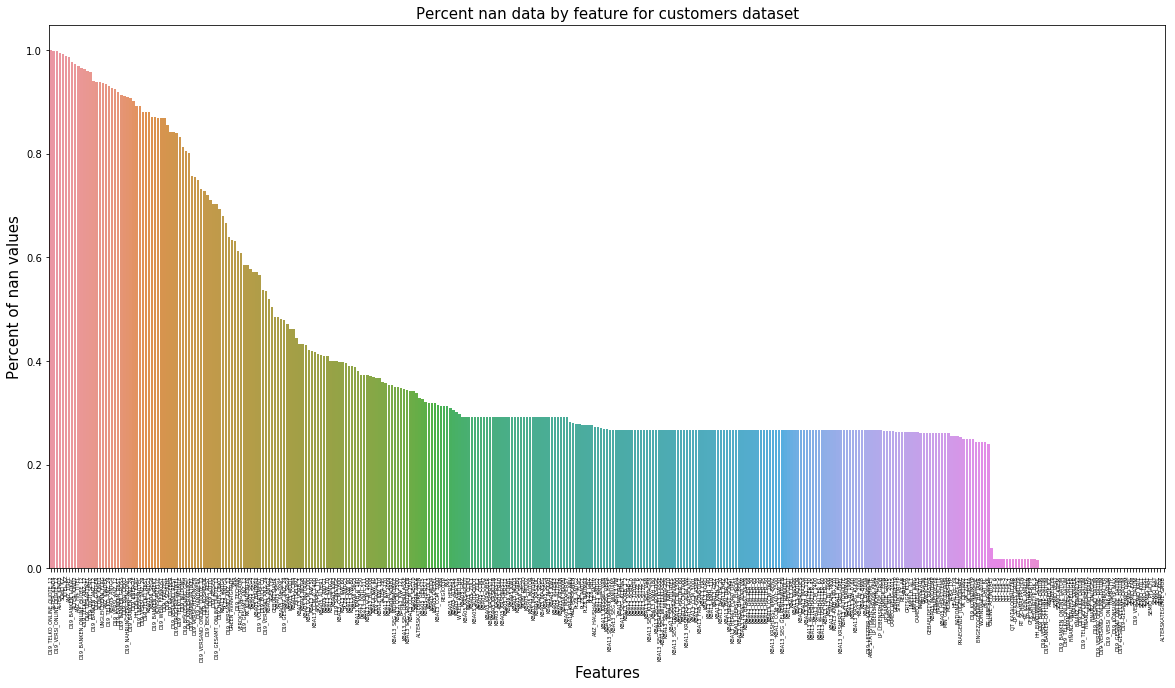

In [38]:
total = clean_customers.isna().sum().sort_values(ascending=False)
percent = (clean_customers.isna().sum()/clean_customers.isna().count()).sort_values(ascending=False)
nan_data_customers = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(20, 10))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(5)

    plt.xticks(rotation='90')
sns.barplot(x=nan_data_customers.index, y=nan_data_customers['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of nan values', fontsize=15)
plt.title('Percent nan data by feature for customers dataset', fontsize=15)

nan_data_customers.head()

,Total,Percent
D19_TELKO_ONLINE_QUOTE_12,890433,0.999116
ALTER_KIND4,890016,0.998648
D19_VERSI_ONLINE_QUOTE_12,889575,0.998153
TITEL_KZ,889061,0.997576
ANZ_TITEL,888041,0.996432


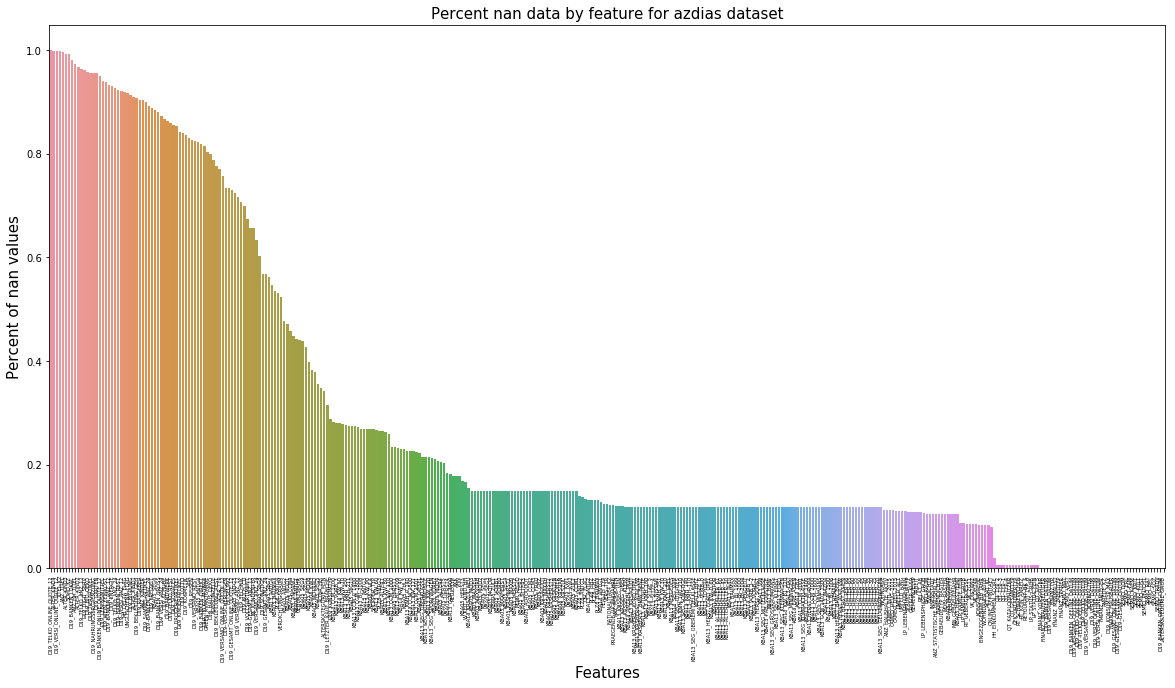

In [39]:
total = clean_azdias.isna().sum().sort_values(ascending=False)
percent = (clean_azdias.isna().sum()/clean_azdias.isna().count()).sort_values(ascending=False)
nan_data_azdias = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(20, 10))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(5)

    plt.xticks(rotation='90')
sns.barplot(x=nan_data_azdias.index, y=nan_data_azdias['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of nan values', fontsize=15)
plt.title('Percent nan data by feature for azdias dataset', fontsize=15)

nan_data_azdias.head()

##### V. Dropping columns with more than 10% of NaN values

We have decided to drop columns with more than 20% NaN values in customers dataset and the same operation is applied to azidas dataset in order to get the same output (the same shape for both datasets). First we create a list of features having more han 20% NaNs and then these columns are dropped.

In [40]:
# Identifying columns with more than 20% nans in customers dataset
features_to_drop = nan_data_customers[nan_data_customers['Percent']>0.20].index

In [41]:
# Dropping same columns in azdias and customers dataset
clean_customers_dropna = clean_customers.drop(features_to_drop, axis=1)
clean_azdias_dropna = clean_azdias.drop(features_to_drop, axis=1)

In [42]:
# Checking if datasets have the same shape
set(clean_azdias.columns == clean_customers.columns)

{True}

In [43]:
# Remaining features and length 
clean_customers_dropna.columns, len(clean_customers_dropna.columns)

(Index(['CJT_GESAMTTYP', 'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2',
        'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6', 'D19_BANKEN_DATUM',
        'D19_BANKEN_OFFLINE_DATUM', 'D19_BANKEN_ONLINE_DATUM',
        'D19_GESAMT_DATUM', 'D19_GESAMT_OFFLINE_DATUM',
        'D19_GESAMT_ONLINE_DATUM', 'D19_KONSUMTYP_MAX', 'D19_TELKO_DATUM',
        'D19_TELKO_OFFLINE_DATUM', 'D19_TELKO_ONLINE_DATUM',
        'D19_VERSAND_DATUM', 'D19_VERSAND_OFFLINE_DATUM',
        'D19_VERSAND_ONLINE_DATUM', 'D19_VERSI_DATUM',
        'D19_VERSI_OFFLINE_DATUM', 'D19_VERSI_ONLINE_DATUM', 'FINANZ_ANLEGER',
        'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER',
        'FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER', 'FINANZTYP',
        'GFK_URLAUBERTYP', 'HH_EINKOMMEN_SCORE', 'KOMBIALTER', 'LP_STATUS_FEIN',
        'LP_STATUS_GROB', 'ONLINE_AFFINITAET', 'RETOURTYP_BK_S',
        'RT_KEIN_ANREIZ', 'RT_SCHNAEPPCHEN', 'SEMIO_DOM', 'SEMIO_ERL',
        'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SE

In [44]:
print ('The percentage of customers dropped columns is {}%.'\
       .format(int(((clean_customers.shape[1] - clean_customers_dropna.shape[1])/clean_customers.shape[1])*100)))

The percentage of customers dropped columns is 84%.


In [45]:
print ('The percentage of azdias dropped is {}%.'\
       .format(int(((clean_azdias.shape[1] - clean_azdias_dropna.shape[1])/clean_azdias.shape[1])*100)))

The percentage of azdias dropped is 84%.


##### VII. Replacing remaining NaNs with -1 value

In [46]:
clean_customers_fillna = clean_customers_dropna.fillna(-1)
clean_azdias_fillna = clean_azdias_dropna.fillna(-1)

##### VIII. Checking data type and cleaned values

In [47]:
# Counting NaN values for each column
clean_customers_fillna.apply(lambda x:x.isna().sum())

CJT_GESAMTTYP                0
CJT_KATALOGNUTZER            0
CJT_TYP_1                    0
CJT_TYP_2                    0
CJT_TYP_3                    0
CJT_TYP_4                    0
CJT_TYP_5                    0
CJT_TYP_6                    0
D19_BANKEN_DATUM             0
D19_BANKEN_OFFLINE_DATUM     0
D19_BANKEN_ONLINE_DATUM      0
D19_GESAMT_DATUM             0
D19_GESAMT_OFFLINE_DATUM     0
D19_GESAMT_ONLINE_DATUM      0
D19_KONSUMTYP_MAX            0
D19_TELKO_DATUM              0
D19_TELKO_OFFLINE_DATUM      0
D19_TELKO_ONLINE_DATUM       0
D19_VERSAND_DATUM            0
D19_VERSAND_OFFLINE_DATUM    0
D19_VERSAND_ONLINE_DATUM     0
D19_VERSI_DATUM              0
D19_VERSI_OFFLINE_DATUM      0
D19_VERSI_ONLINE_DATUM       0
FINANZ_ANLEGER               0
FINANZ_HAUSBAUER             0
FINANZ_MINIMALIST            0
FINANZ_SPARER                0
FINANZ_UNAUFFAELLIGER        0
FINANZ_VORSORGER             0
FINANZTYP                    0
GFK_URLAUBERTYP              0
HH_EINKO

In [48]:
# Data types
set(clean_customers_fillna.dtypes)

{dtype('int64'), dtype('float64')}

##### IX. Normalizing the data

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. In our dataset, normalization is required because features have different ranges. We transforms features by scaling each feature between zero and one using [MinMaxScler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from Scikitleran module
We create an estimator which scales and translates each feature individually such that it is between zero and one.

In [49]:
# Creating scaled customers dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

customers_scaled = pd.DataFrame(scaler.fit_transform(clean_customers_fillna.astype(float)))
customers_scaled.index = clean_customers_fillna.index
customers_scaled.columns = clean_customers_fillna.columns

azdias_scaled = pd.DataFrame(scaler.fit_transform(clean_azdias_fillna.astype(float)))
azdias_scaled.index = clean_azdias_fillna.index
azdias_scaled.columns = clean_azdias_fillna.columns

### Save cleaned data as pickle file

In [50]:
customers_scaled.to_pickle("cleaned_customers.pkl")
azdias_scaled.to_pickle("cleaned_azdias.pkl")

### 3- Data Visualization

In [51]:
customers_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191652 entries, 1 to 191652
Data columns (total 57 columns):
CJT_GESAMTTYP                191652 non-null float64
CJT_KATALOGNUTZER            191652 non-null float64
CJT_TYP_1                    191652 non-null float64
CJT_TYP_2                    191652 non-null float64
CJT_TYP_3                    191652 non-null float64
CJT_TYP_4                    191652 non-null float64
CJT_TYP_5                    191652 non-null float64
CJT_TYP_6                    191652 non-null float64
D19_BANKEN_DATUM             191652 non-null float64
D19_BANKEN_OFFLINE_DATUM     191652 non-null float64
D19_BANKEN_ONLINE_DATUM      191652 non-null float64
D19_GESAMT_DATUM             191652 non-null float64
D19_GESAMT_OFFLINE_DATUM     191652 non-null float64
D19_GESAMT_ONLINE_DATUM      191652 non-null float64
D19_KONSUMTYP_MAX            191652 non-null float64
D19_TELKO_DATUM              191652 non-null float64
D19_TELKO_OFFLINE_DATUM      191652 non-n

In [52]:
customers_scaled.describe()

,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_DATUM,D19_BANKEN_OFFLINE_DATUM,...,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,...,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000
mean,0.657072,0.820992,0.600665,0.581500,0.903981,0.887422,0.904569,0.907663,0.929733,0.985164,...,0.480527,0.421376,0.360980,0.518798,0.457023,0.319860,0.530880,0.315361,0.376432,0.257613
std,0.270904,0.251845,0.267220,0.268327,0.186631,0.205276,0.189334,0.188392,0.182585,0.085806,...,0.306688,0.248986,0.219370,0.345160,0.286340,0.203204,0.394568,0.233697,0.484492,0.135782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.428571,0.666667,0.333333,0.333333,0.833333,0.833333,0.833333,0.833333,1.000000,1.000000,...,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,0.000000,0.250000
50%,0.714286,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.500000,0.500000,0.333333,0.500000,0.333333,0.333333,0.666667,0.400000,0.000000,0.250000
75%,1.000000,1.000000,0.833333,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.666667,0.666667,0.500000,1.000000,0.833333,0.500000,0.833333,0.400000,1.000000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### I. Histogram

After cleaning and preprocessing the data we’ll use visualization tools such as histogram and correlation matrix heatmap to represent distribution and features correlation. The histogram plots below show different distribution of features. However because of the large number of features we need to reduce the dimensionality of dataframe in order to get a better overview of the data.   

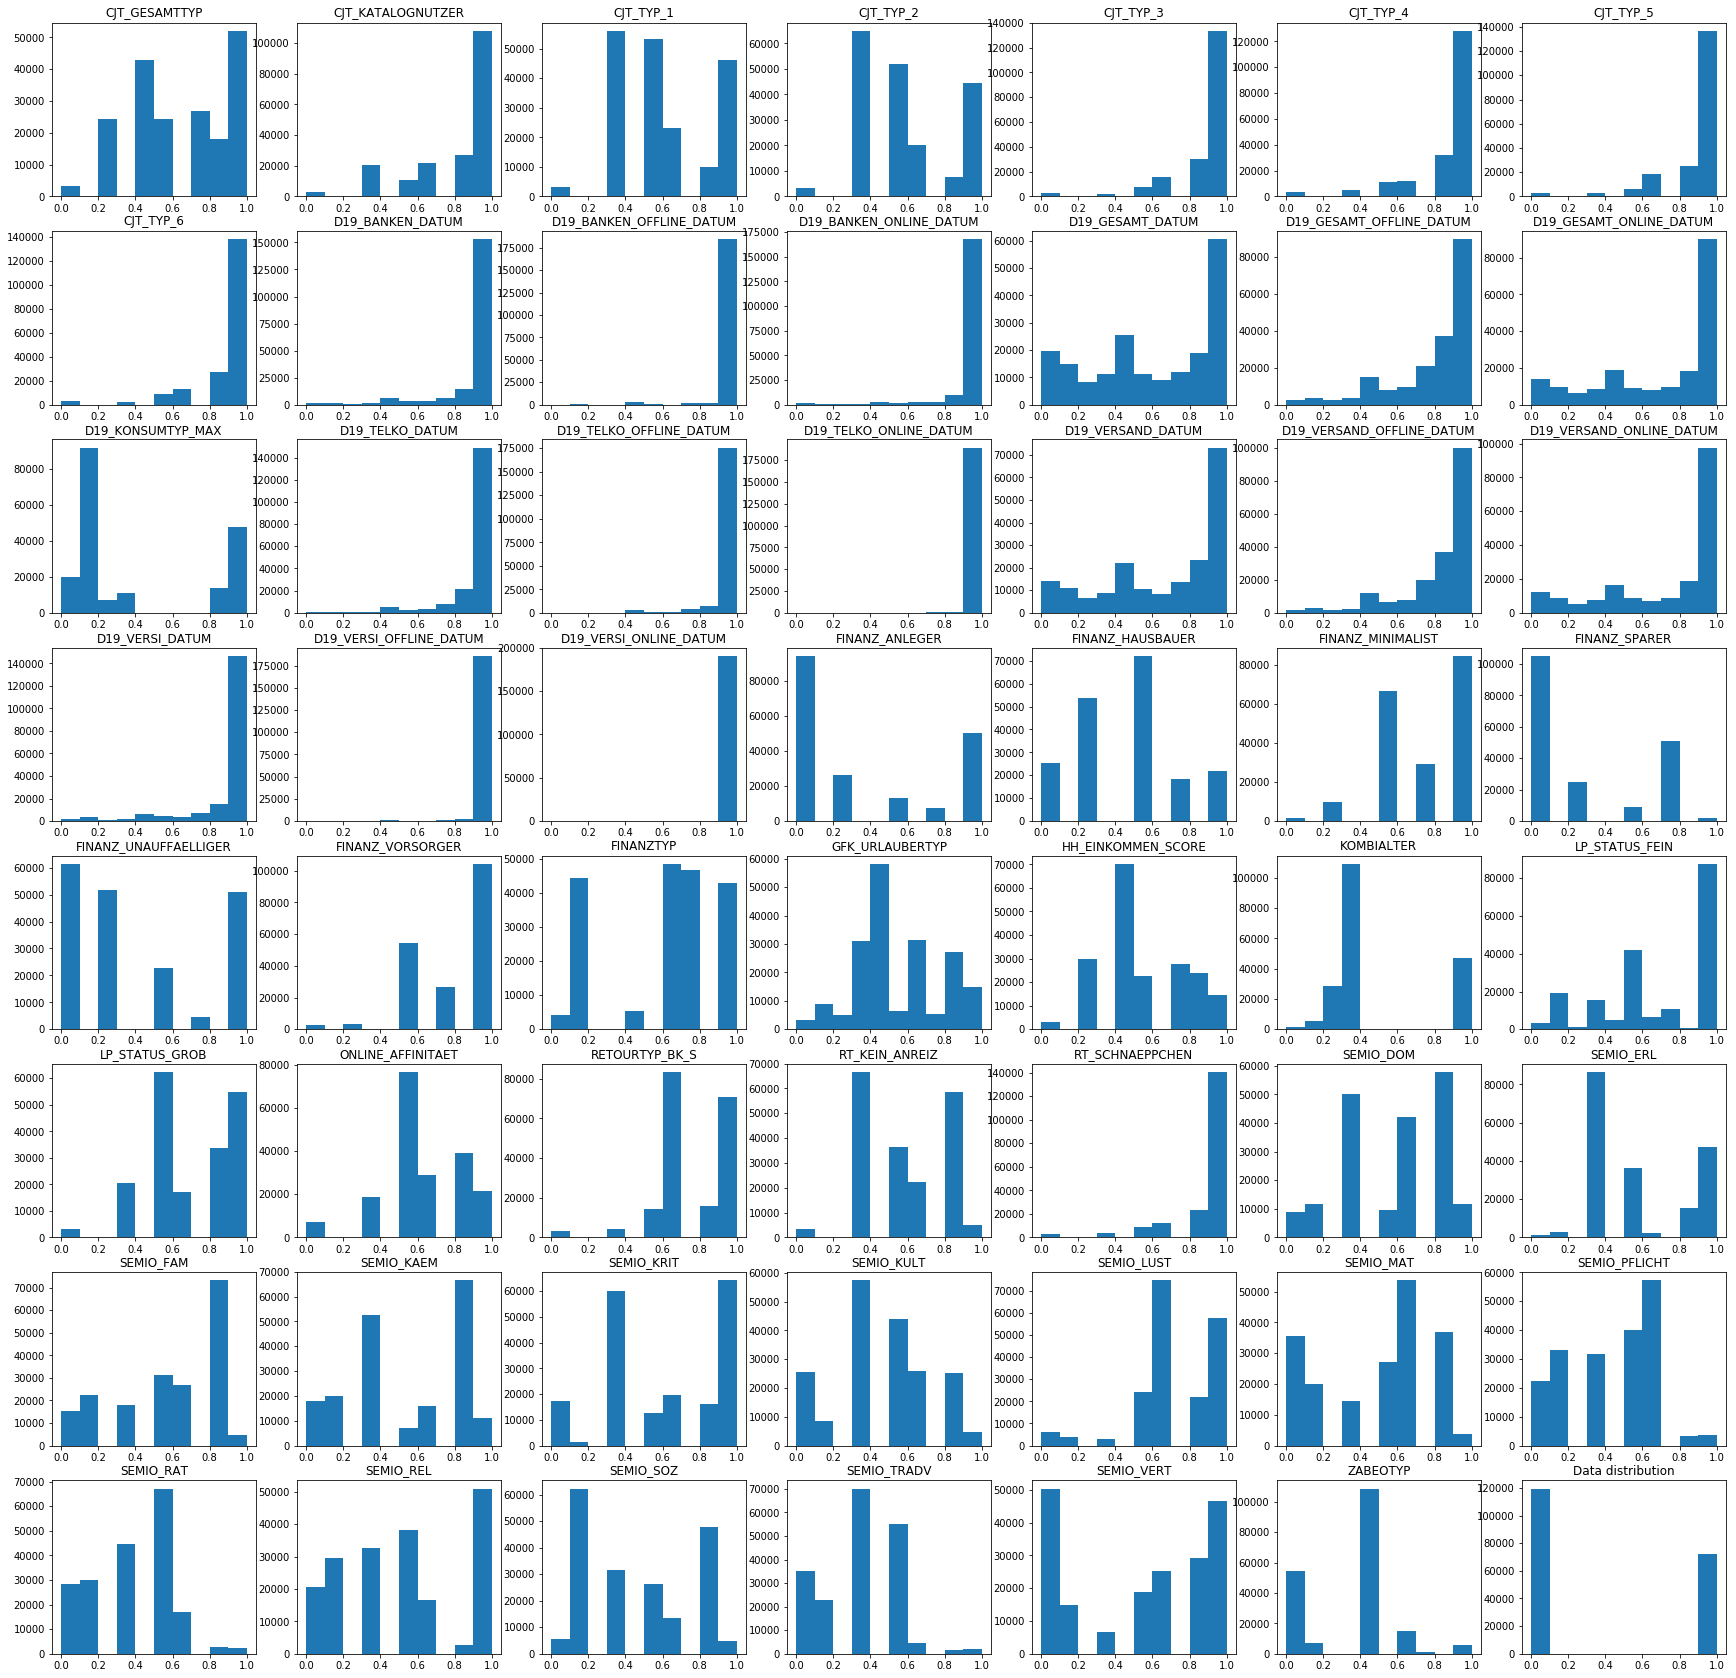

In [53]:
fig, axs = plt.subplots(8,7, figsize = (30,30))
axs = axs.flatten()

for i,name in list(zip(range(len(axs)),customers_scaled.columns[:len(axs)])):
    axs[i].set_title(name)
    axs[i].hist(customers_scaled[name], bins=10)
plt.title ('Data distribution')
plt.show()

##### II. Correlation matrix heatmap

In the same way we look at the correlation heatmap of our data. This figure below is also confirming the need of dimensionality reduction and simplification of the data.

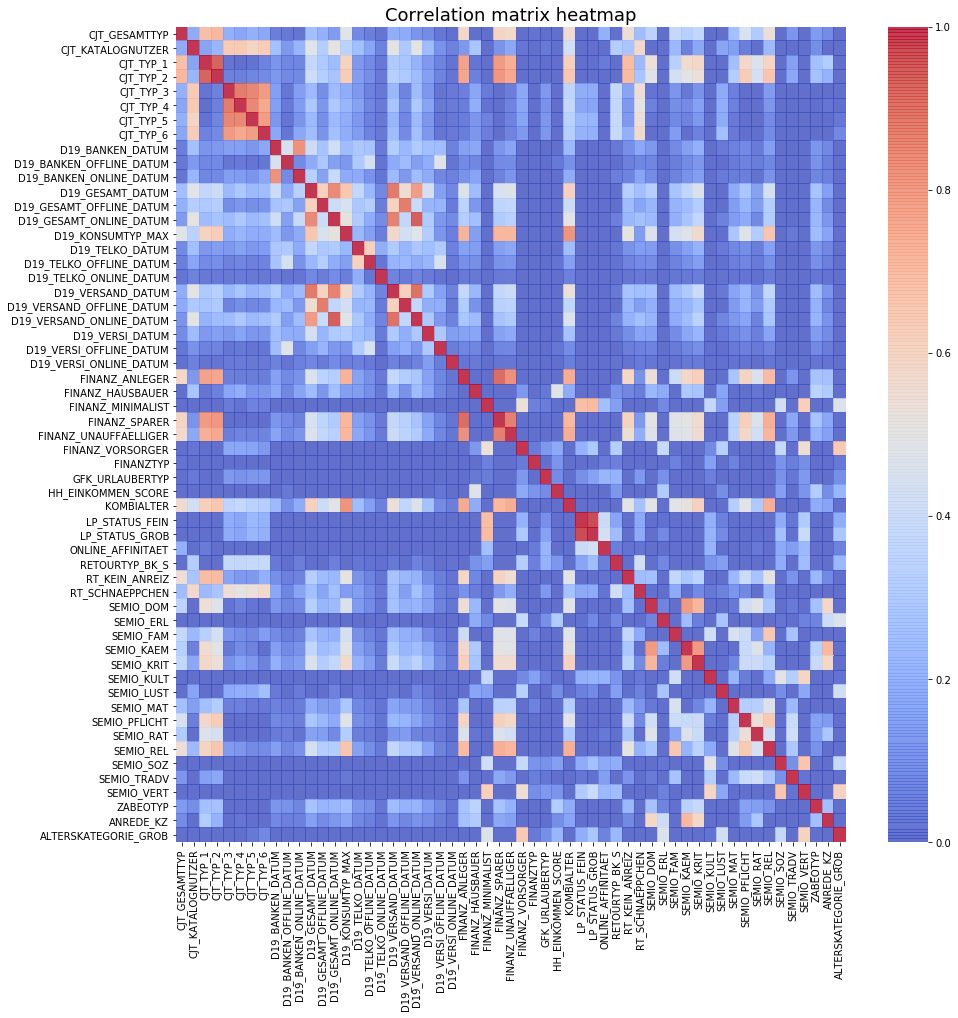

In [54]:
plt.figure(figsize=(15,15))
plt.title('Correlation matrix heatmap', fontsize=18)
sns.heatmap(customers_scaled.corr(), vmin=0, vmax=1, cmap="coolwarm", alpha=0.8);

### 4- Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a technique which uses sophisticated mathematical principles to transforms a number of possibly correlated variables into a smaller number of variables called principal components. The origins of PCA lie in [multivariate data analysis](https://is.muni.cz/el/1423/podzim2017/PSY028/um/_Hair_-_Multivariate_data_analysis_7th_revised.pdf-). One of the most important and perhaps its most common use is as to reduce dimensionality of large data sets. First we choose the n_components (the number of components we want to keep) value to retain regarding the explained variance (visualizing with elbow graph). Then we build our model according to azdias dataset. Once our azdias PCA model is ready we map the customers dataset into the azdias pca model. the PCA model used is import ed from Scikitlearn [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [166]:
# Read preprocessed customers data
customers_scaled = pd.read_pickle("cleaned_customers.pkl")
azdias_scaled = pd.read_pickle("cleaned_azdias.pkl")

In [167]:
# Intersection between customers dataframe and attributes dataframe
intersection_attributes = list(set(customers_scaled.columns).intersection(attributes.Attribute))

NameError: name 'attributes' is not defined

In [57]:
list_description = []
print ('The cleaned and scaled customers dataframe attributes are described as follows: \n')
for i in intersection_attributes:
    description = attributes[attributes['Attribute']== i]['Description'].values[0]
    list_description.append(description)
    print ('{} : {}'.format(i, description))

The cleaned and scaled customers dataframe attributes are described as follows: 

ONLINE_AFFINITAET : online affinity
D19_GESAMT_DATUM : actuality of the last transaction with the complete file TOTAL
D19_VERSAND_DATUM : actuality of the last transaction for the segment mail-order TOTAL
FINANZ_MINIMALIST : financial typology: low financial interest
ALTERSKATEGORIE_GROB : age classification through prename analysis 
D19_TELKO_ONLINE_DATUM : actuality of the last transaction for the segment telecommunication ONLINE
SEMIO_ERL : affinity indicating in what way the person is eventful orientated
ANREDE_KZ : gender
LP_STATUS_GROB : social status rough
D19_BANKEN_ONLINE_DATUM : actuality of the last transaction for the segment banks ONLINE
CJT_GESAMTTYP : customer journey typology
HH_EINKOMMEN_SCORE : estimated household net income 
FINANZTYP : best descirbing financial type for the person
D19_TELKO_OFFLINE_DATUM : actuality of the last transaction for the segment telecommunication OFFLINE
D19_

In [58]:
len(list_description)

43

In [59]:
# Here below the missing features that are not described are listed.
no_desc_list = list(set(customers_scaled.columns)^set(intersection_attributes))

In [60]:
print ('List of features with no description: ')
no_desc_list

List of features with no description: 


['CJT_TYP_1',
 'D19_VERSI_ONLINE_DATUM',
 'CJT_TYP_5',
 'D19_VERSI_DATUM',
 'D19_VERSI_OFFLINE_DATUM',
 'RT_SCHNAEPPCHEN',
 'CJT_TYP_3',
 'D19_KONSUMTYP_MAX',
 'CJT_TYP_2',
 'KOMBIALTER',
 'RT_KEIN_ANREIZ',
 'CJT_KATALOGNUTZER',
 'CJT_TYP_6',
 'CJT_TYP_4']

In [168]:
from sklearn.decomposition import PCA

In [169]:
def dim_reduction(df, pca):
    '''Reduce dimensionality of data using pca decomposition.
       :param df: Normalized customer dataframe; 
       :param pca: principal component analysis.
       return reduced dataframe and pca model
       '''
    
    min_features = df.shape[1]-1
    pca = pca(n_components=min_features)
    pca.fit(df)
    reduced = pca.transform(df)
    columns = ['c_{}'.format(i) for i in range(min_features)]
    print ('The dataframe has {} features and it is reduced to {}'.format(df.shape[1],min_features))
    
    return pd.DataFrame(data=reduced, columns=columns, index=df.index),pca

In [170]:
reduced_azdias,pca_azdias = dim_reduction(azdias_scaled, pca=PCA)

The dataframe has 57 features and it is reduced to 56


In [172]:
# Save PCA model to use later
import pickle

filename = 'pca_model.sav'
pickle.dump(pca_azdias, open(filename, 'wb'))

In [64]:
reduced_customers = pca_azdias.transform(customers_scaled)

In [65]:
min_features = customers_scaled.shape[1]-1
reduced_customers = pd.DataFrame(data=reduced_customers, \
                                 columns = ['c_{}'.format(i) for i in range(min_features)], \
                                 index = customers_scaled.index)

In [66]:
reduced_azdias.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_46,c_47,c_48,c_49,c_50,c_51,c_52,c_53,c_54,c_55
LNR,,,,,,,,,,,,,,,,,,,,,
191653,-0.811452,-1.274087,-0.394624,0.536243,0.428978,-0.272256,0.208318,0.130107,-0.374549,-0.015164,...,-0.004256,-0.004225,0.034973,-0.031025,-0.003305,0.001050,0.001056,-0.001361,-0.000345,-0.012379
191654,0.960619,-0.571864,0.839011,0.640866,-0.092142,-0.276716,-0.760382,-0.531621,-0.061749,0.035263,...,-0.032549,-0.000572,0.030135,0.033474,-0.005501,-0.003680,-0.003121,-0.018735,0.002919,0.014020
191655,0.602320,-0.515073,-0.789517,-1.173841,0.843082,0.350187,-0.202789,-0.055925,0.205694,-0.184959,...,-0.006888,0.014425,-0.187576,-0.027908,-0.000760,0.001553,0.002093,0.000328,-0.000828,0.027867
191656,0.620770,-0.971363,-0.495339,-1.141655,0.736106,0.328795,-0.043147,-0.088370,0.027789,0.033241,...,0.000249,-0.004653,0.069566,-0.005373,0.001854,-0.000243,-0.000397,-0.000308,-0.000062,0.022354
191657,-0.731002,-0.570668,1.017752,0.820290,0.650232,-0.135740,0.123390,-0.016908,0.129252,-0.194120,...,0.024602,-0.021159,-0.084691,0.003717,-0.011327,0.021721,0.015730,-0.010969,0.001944,-0.013575


##### Data Variance

Our PCA model creates 57 principal components, however we will select top_n components to capture a defined explained variance set here to 80%-90%. The top_n components value is determined by using pca attribute [pca.explained_variance_ratio_](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Thereafter we will analyse the impact (weight) of each feature on each component using pca.components_ provided by sklearn module.

In [67]:
reduced_customers.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_46,c_47,c_48,c_49,c_50,c_51,c_52,c_53,c_54,c_55
LNR,,,,,,,,,,,,,,,,,,,,,
1,-1.647239,1.597327,0.537885,-0.215829,0.689490,0.043500,0.065084,0.316609,0.285689,-0.049375,...,-0.157666,0.062058,0.022543,0.002146,0.006981,-0.051866,-0.065370,-0.062248,0.006878,0.072991
2,-1.251002,0.837168,-0.065124,-0.518928,-0.098754,0.251810,0.637502,0.202391,0.001391,0.148745,...,-0.268580,0.145528,0.014255,-0.013573,-0.079935,0.030217,0.048825,0.052564,-0.029796,0.049176
3,-1.425158,-0.733504,0.433640,0.572023,0.612990,-0.215155,0.445772,0.321228,0.138036,0.197466,...,0.168588,0.141404,0.024341,-0.157097,-0.066120,-0.056319,-0.263901,0.104162,-0.006790,-0.022661
4,-1.226782,1.042522,-0.156262,-0.393295,0.081889,-0.415489,0.376440,0.255285,0.181120,-0.317404,...,-0.061316,0.027781,0.054033,-0.010074,0.026480,-0.031487,0.012826,0.004810,-0.012170,0.052267
5,-1.382802,-0.924632,0.162189,-0.467173,-0.340547,0.126264,-0.010407,-0.229736,-0.019956,0.317900,...,0.064493,-0.038577,0.044371,0.048346,-0.007569,0.022403,0.027691,0.026727,-0.001094,0.008516


In [68]:
print ('The make up of principal components for azdias dataframe: \n' )
print (pca_azdias.components_)
print ('has {} rows '.format(pca_azdias.components_.shape[0]))
print ('and {} columns '.format(pca_azdias.components_.shape[1]))

The make up of principal components for azdias dataframe: 

[[  9.19552036e-02  -8.95755842e-02   1.92687535e-01 ...,   8.62422480e-02
    4.35357958e-02  -1.00342749e-01]
 [  1.18312237e-02   1.77804565e-02  -3.03464534e-02 ...,  -5.21448536e-02
   -4.51654662e-01  -1.85410050e-02]
 [  1.85511987e-02  -1.75946914e-01   3.61411675e-02 ...,  -4.33532565e-02
    2.95115004e-01  -3.74635974e-03]
 ..., 
 [ -2.82570550e-06  -2.85210712e-03   2.89309317e-03 ...,  -6.25489147e-04
    6.05804601e-05  -2.78924612e-03]
 [  7.95342873e-05  -3.90252423e-04   1.57158453e-03 ...,  -1.04727316e-04
    1.31215054e-04   2.53869446e-03]
 [ -1.15955759e-03  -1.06043961e-02   1.58211498e-03 ...,   4.89385283e-03
   -1.36795165e-03  -1.65824557e-02]]
has 56 rows 
and 57 columns 


In [69]:
print ('The explained variance ratio of principal components: \n' )
print (pca_azdias.explained_variance_ratio_)
print ('has {} sorted elements '.format(pca_azdias.explained_variance_ratio_.shape[0]))

The explained variance ratio of principal components: 

[  2.20916799e-01   1.72291479e-01   1.50329640e-01   6.75163376e-02
   4.33767812e-02   3.34647467e-02   2.71739931e-02   1.87211205e-02
   1.68648437e-02   1.62432975e-02   1.38856552e-02   1.36983321e-02
   1.30628840e-02   1.21526663e-02   1.14118229e-02   1.09865486e-02
   9.97329158e-03   9.51089563e-03   9.20039637e-03   8.07965135e-03
   7.91757892e-03   7.75946668e-03   7.40871135e-03   6.52430784e-03
   6.39603060e-03   6.16726141e-03   5.88438125e-03   5.62207715e-03
   5.54388995e-03   4.94545227e-03   4.90136142e-03   4.50828629e-03
   4.03964956e-03   3.97708646e-03   3.76382729e-03   3.45758817e-03
   3.33997995e-03   3.14264993e-03   3.03633939e-03   2.65500219e-03
   2.56664926e-03   2.54498920e-03   2.45255296e-03   2.17633259e-03
   1.74665187e-03   1.65835005e-03   1.42363929e-03   1.00098734e-03
   9.79885255e-04   8.87603292e-04   7.57042759e-04   5.73404992e-04
   4.28197014e-04   3.55344237e-04   2.51438266

##### Data variance vs dimensionality reduction

In this model we want to capture 80% to 90% of the explained variance and be able to reduce the dimensionality as much as we can. For this purpose we visualize the explained ratio vs top_n components to understand the situation.

We can distinguish the data variance starting from 35% (top_n=1) to 99% (top_n=57). The goal is to choose the best top_n value which is situated between 10 and 20 compnents where the slope start to decrease.

In [70]:
azdias_explained_variance_ratio = pca_azdias.explained_variance_ratio_

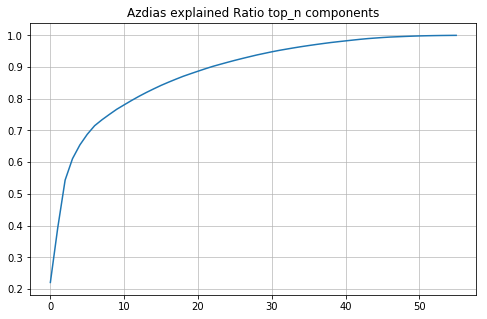

In [71]:
list_of_var_sums = []
top_n = 57
total_sum = 0
for i in range(len(azdias_explained_variance_ratio[:top_n])):
    total_sum = total_sum + azdias_explained_variance_ratio[i]
    list_of_var_sums.append(total_sum)
    
plt.figure(figsize=(8,5))
plt.title('Azdias explained Ratio top_n components', fontsize=12)
plt.grid(alpha=0.8)
plt.plot(list_of_var_sums)
plt.show()

In [72]:
# The good top_n for azdias dataframe
top_n=16
print ('We retain {} components and capture {}% explained variance for azdias dataframe'\
       .format(top_n,(pca_azdias.explained_variance_ratio_[:top_n].sum()*100).round(2)))

We retain 16 components and capture 84.21% explained variance for azdias dataframe


##### Component Makeup

Once we have determine the top_n components, we want to visualize the makeup of each PCA component based on the weightings of the original features that are included in the component. To make it possible we create a function to display ascending n_weights features in th component.


In [73]:
def display_component(v, features_list, component_num, n_weights=10):
    
    # get index of component (last row - component_num)
    row_idx = 57-component_num

    # get the list of weights from a row in v, dataframe
    v_1_row = v.iloc[:, row_idx]
    v_1 = np.squeeze(v_1_row.values)

    # match weights to features in counties_scaled dataframe, using list comporehension
    comps = pd.DataFrame(list(zip(v_1, features_list)), 
                         columns=['weights', 'features'])

    # we'll want to sort by the largest n_weights
    # weights can be neg/pos and we'll sort by magnitude
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

    # display using seaborn
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(component_num))
    plt.show()

In [74]:
# Creating components dataframe
comp_azdias = pca_azdias.components_
v_a = pd.DataFrame(data=comp_azdias)

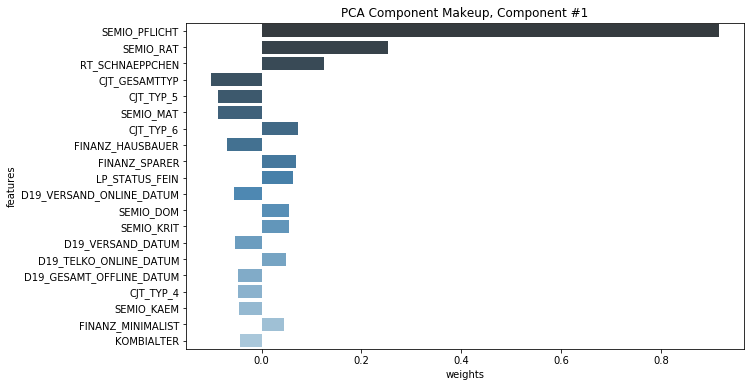

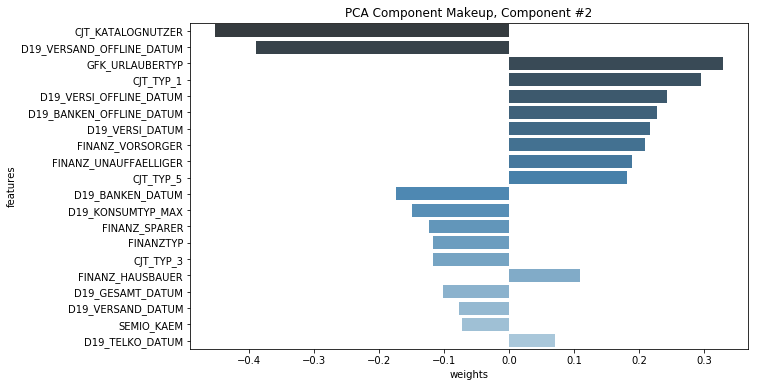

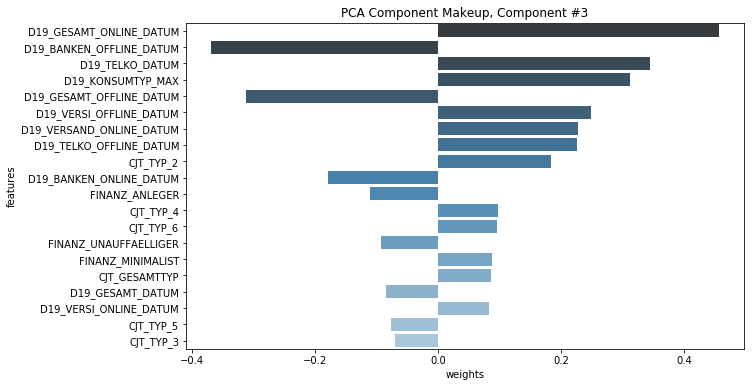

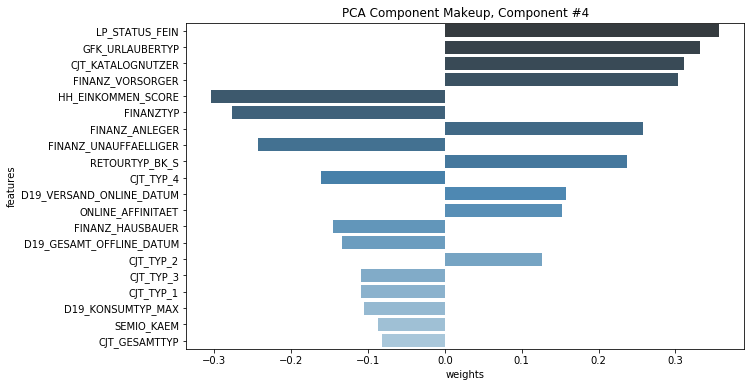

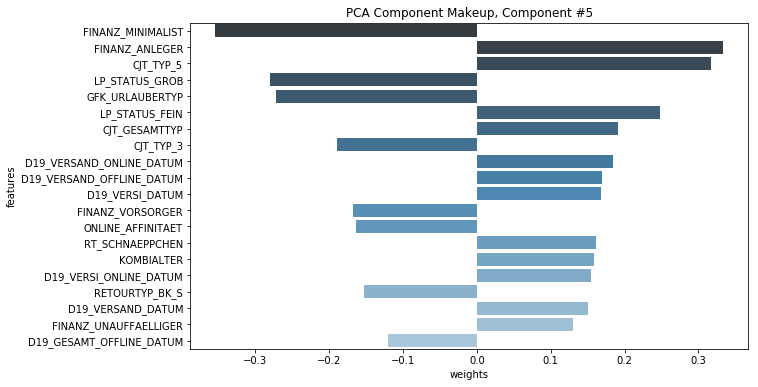

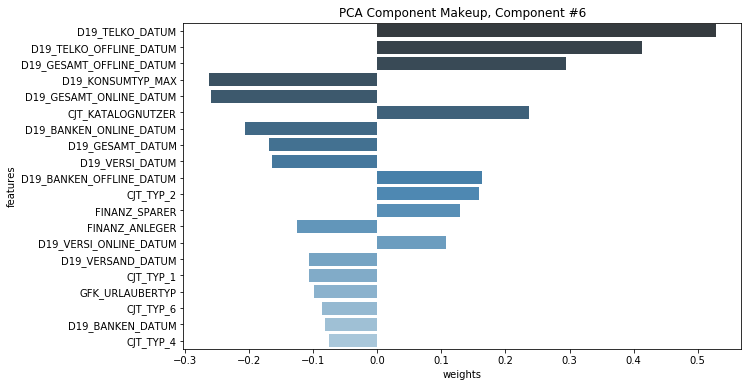

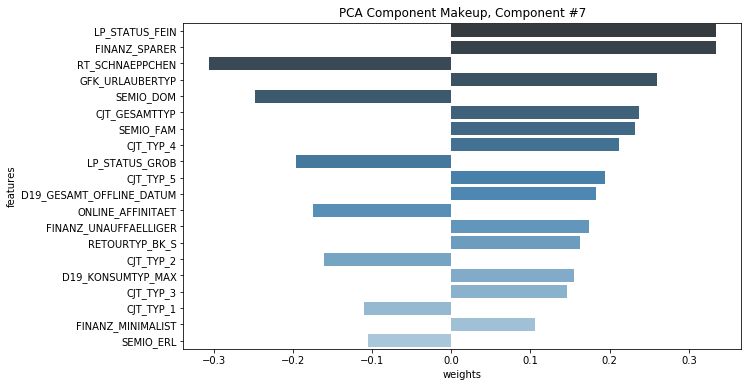

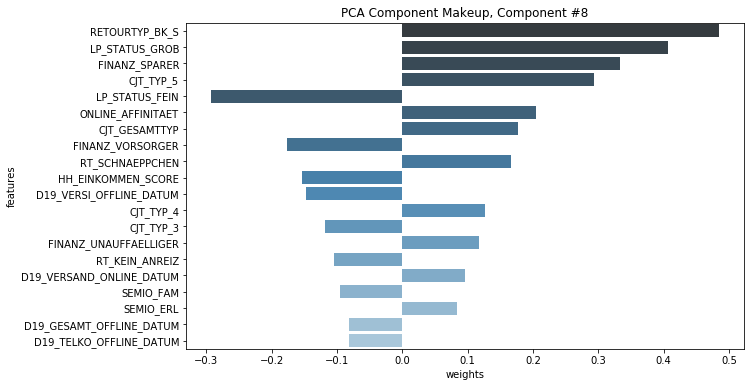

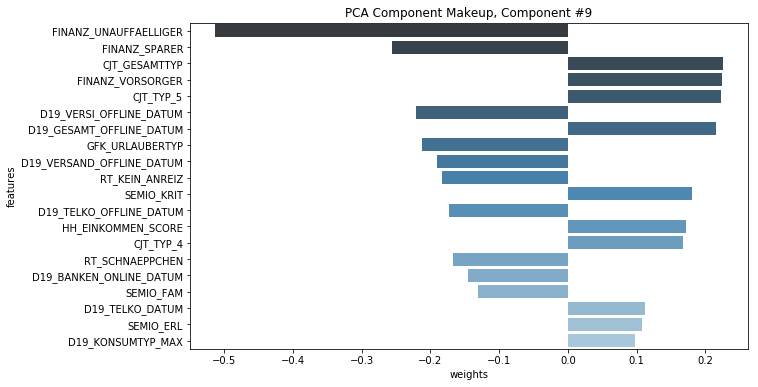

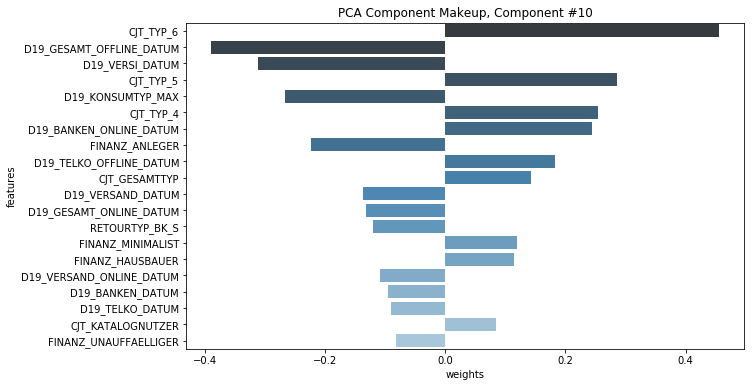

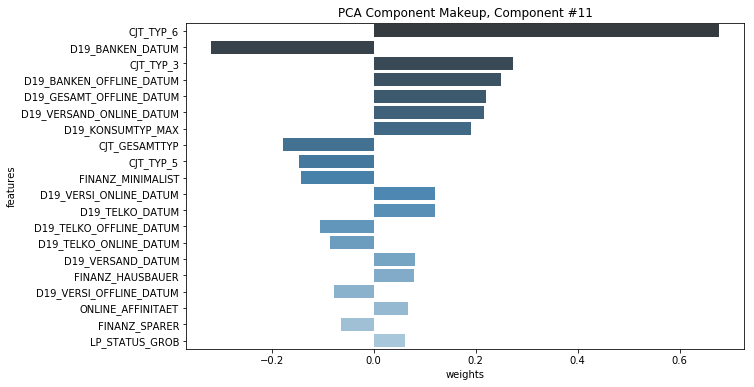

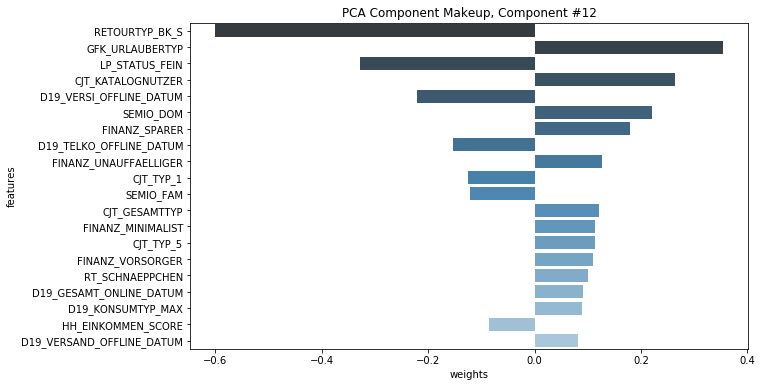

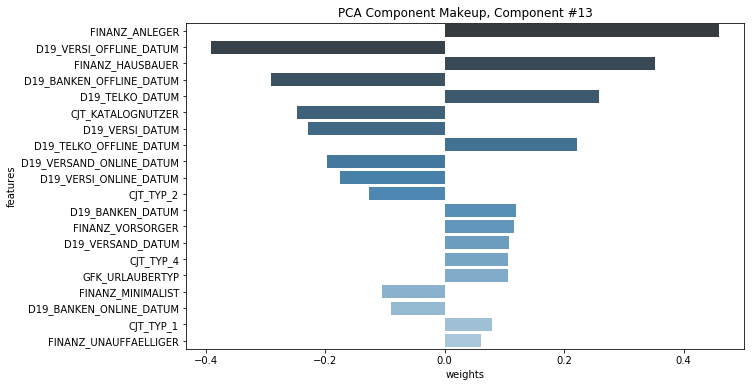

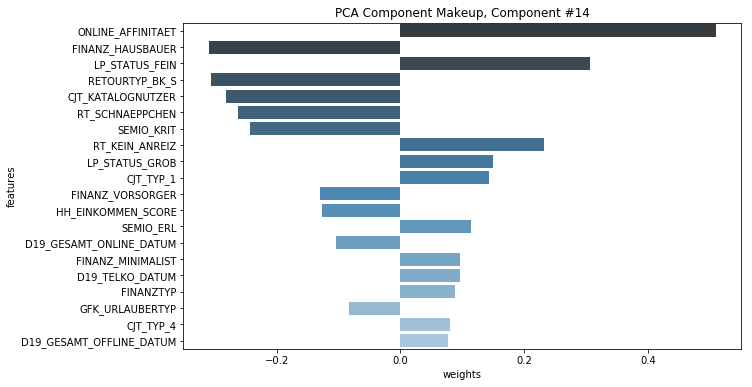

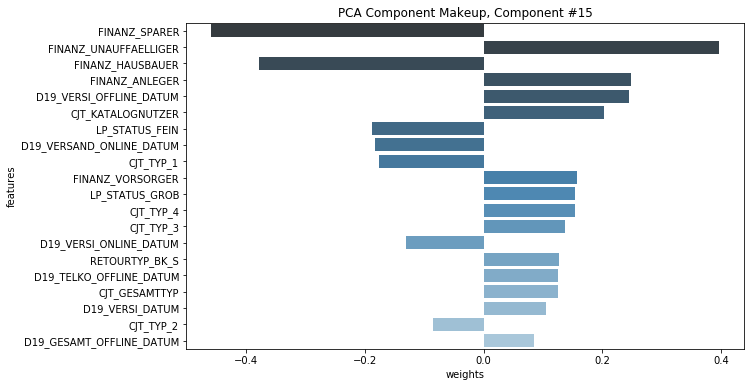

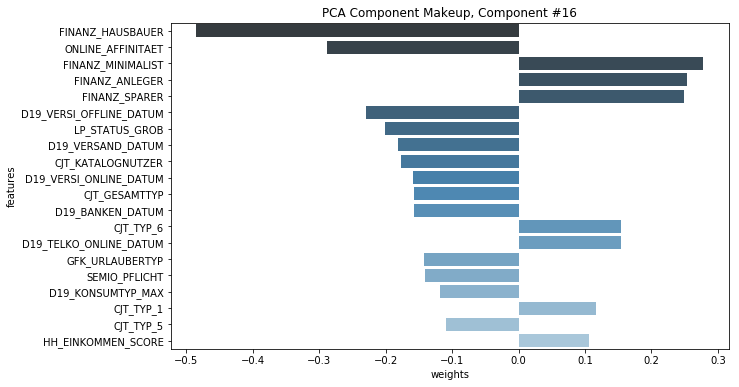

In [75]:
# Display makeup of first component
for i in range(1, top_n+1):
    display_component(v_a, azdias_scaled.columns.values, component_num=i, n_weights=20)

In [76]:
columns = ['c_{}'.format(i) for i in range(top_n)]
reduced_customers = reduced_customers[columns]
reduced_azdias = reduced_azdias[columns]

In [77]:
reduced_customers.shape

(191652, 16)

In [78]:
reduced_azdias.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15
LNR,,,,,,,,,,,,,,,,
191653,-0.811452,-1.274087,-0.394624,0.536243,0.428978,-0.272256,0.208318,0.130107,-0.374549,-0.015164,0.270821,0.095470,-0.000859,-0.262082,-0.404160,0.106808
191654,0.960619,-0.571864,0.839011,0.640866,-0.092142,-0.276716,-0.760382,-0.531621,-0.061749,0.035263,0.296035,0.007392,-0.447308,-0.048724,0.348336,-0.129924
191655,0.602320,-0.515073,-0.789517,-1.173841,0.843082,0.350187,-0.202789,-0.055925,0.205694,-0.184959,-0.086090,0.004549,-0.003981,0.000419,0.043968,-0.089782
191656,0.620770,-0.971363,-0.495339,-1.141655,0.736106,0.328795,-0.043147,-0.088370,0.027789,0.033241,-0.113173,-0.093389,-0.031291,-0.025838,-0.114455,-0.026018
191657,-0.731002,-0.570668,1.017752,0.820290,0.650232,-0.135740,0.123390,-0.016908,0.129252,-0.194120,-0.274083,-0.483693,0.067230,-0.118644,0.129995,0.021845


##### I. Histogram

The following distribution of components in the figure below show our pca model improves the explainability of of the data. In this plot we are now able visualize data in a compact representation. 

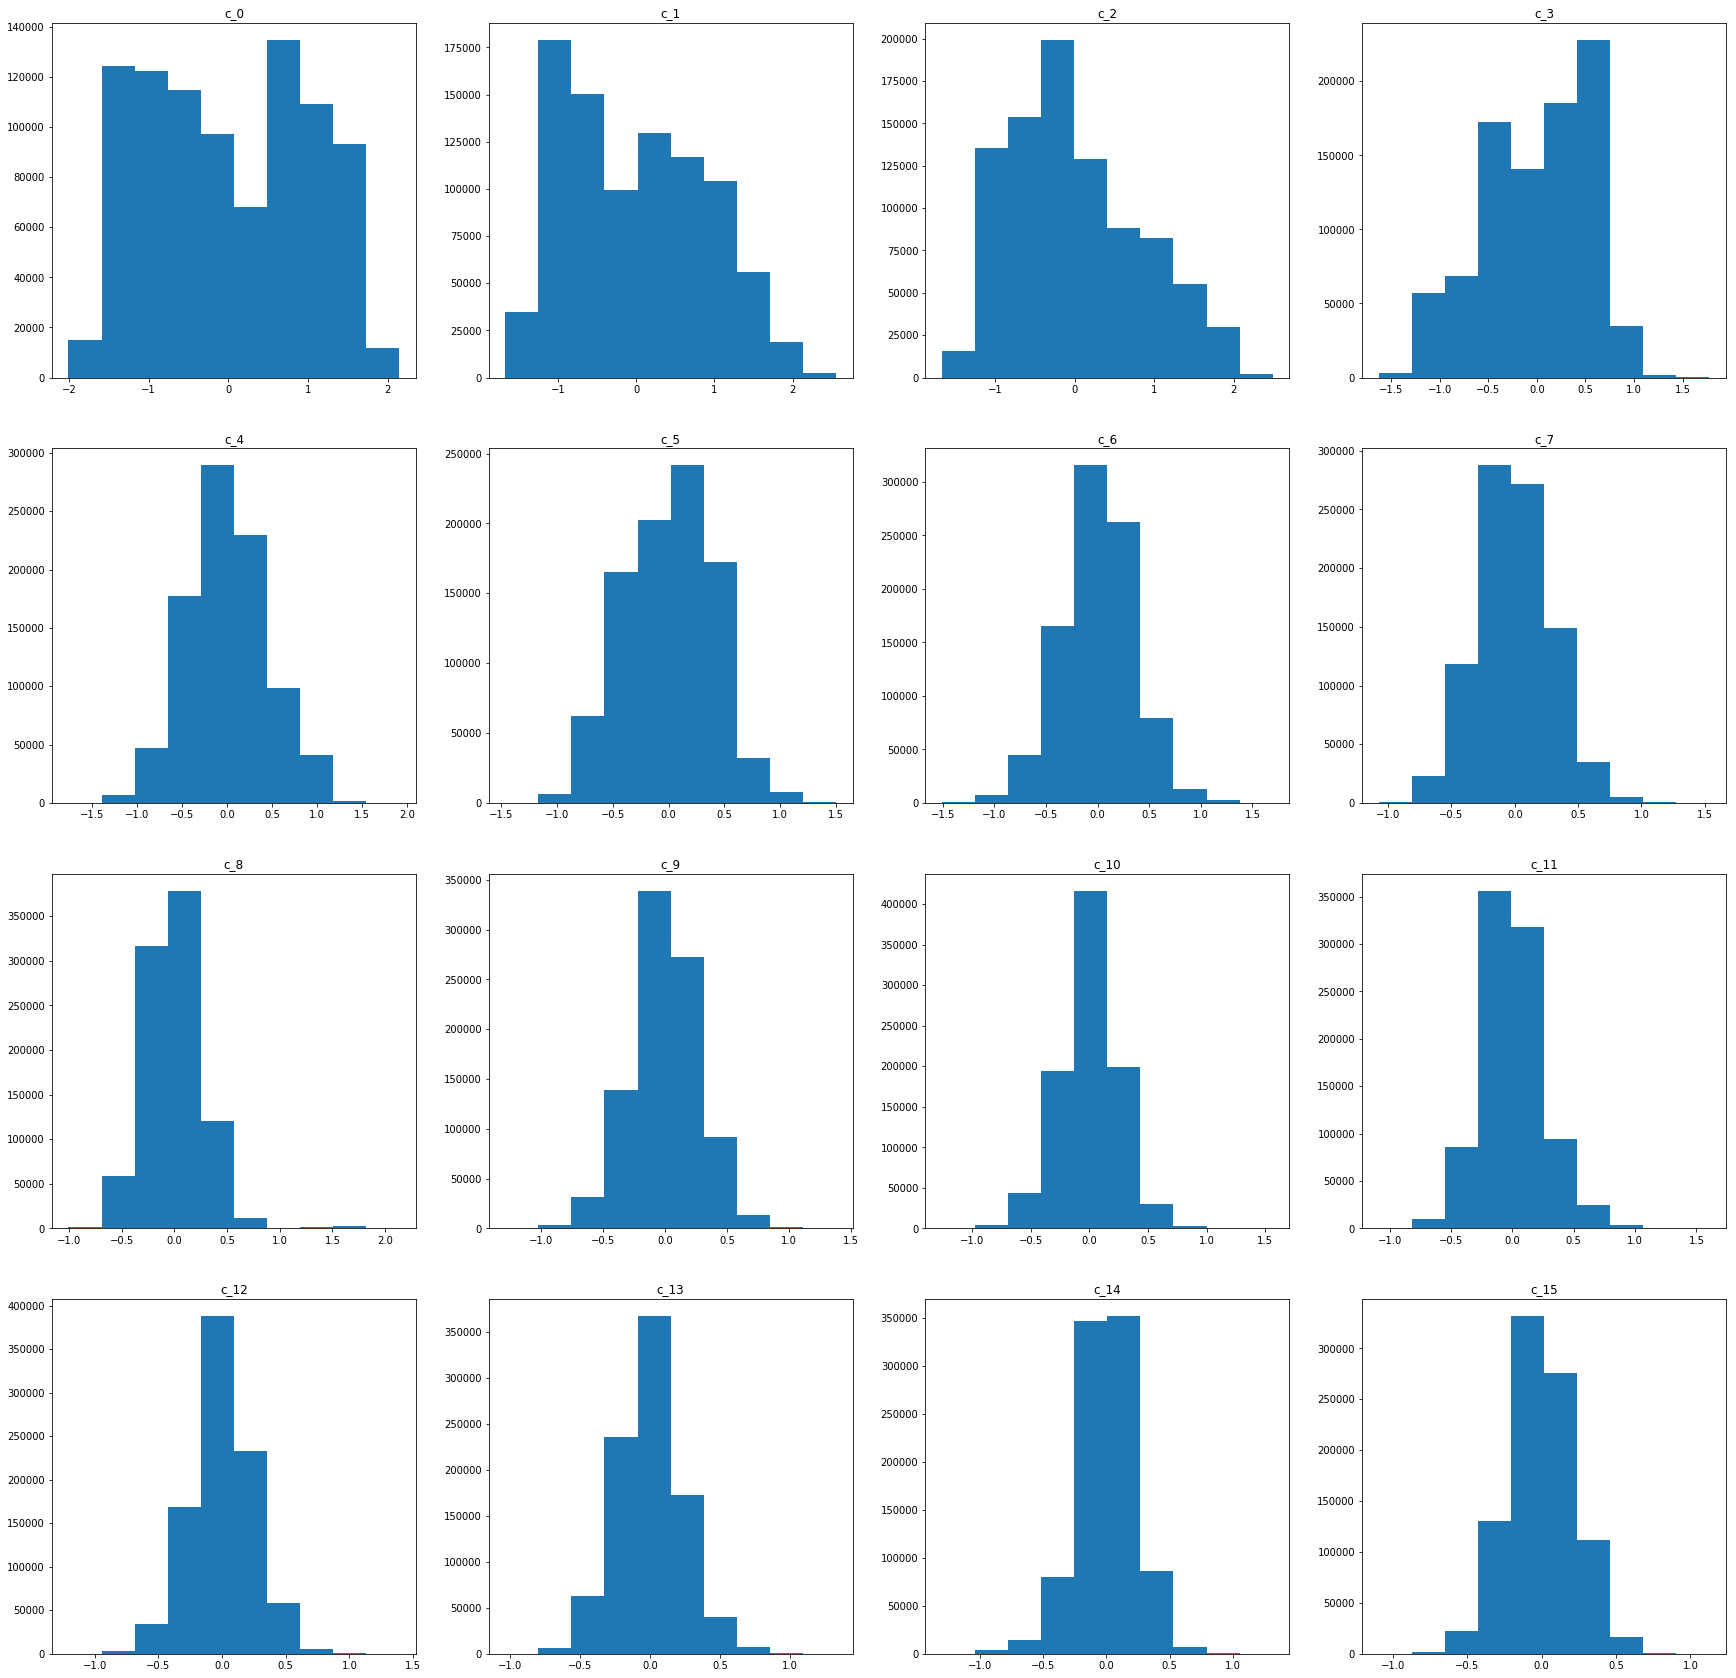

In [79]:
fig, axs = plt.subplots(4,4, figsize = (30,30))
axs = axs.flatten()
for i,name in list(zip(range(len(axs)),reduced_azdias.columns)):
    axs[i].set_title(name)
    axs[i].hist(reduced_azdias[name], bins=10)
plt.show()

##### II. Correlation matrix heatmap

Now we use correlation heatmap to see how our components are connected to each other. In this figure below we obesrve that components are totally independent and it shows that our dimensionnality reduction has an important role in simplification of the data. 

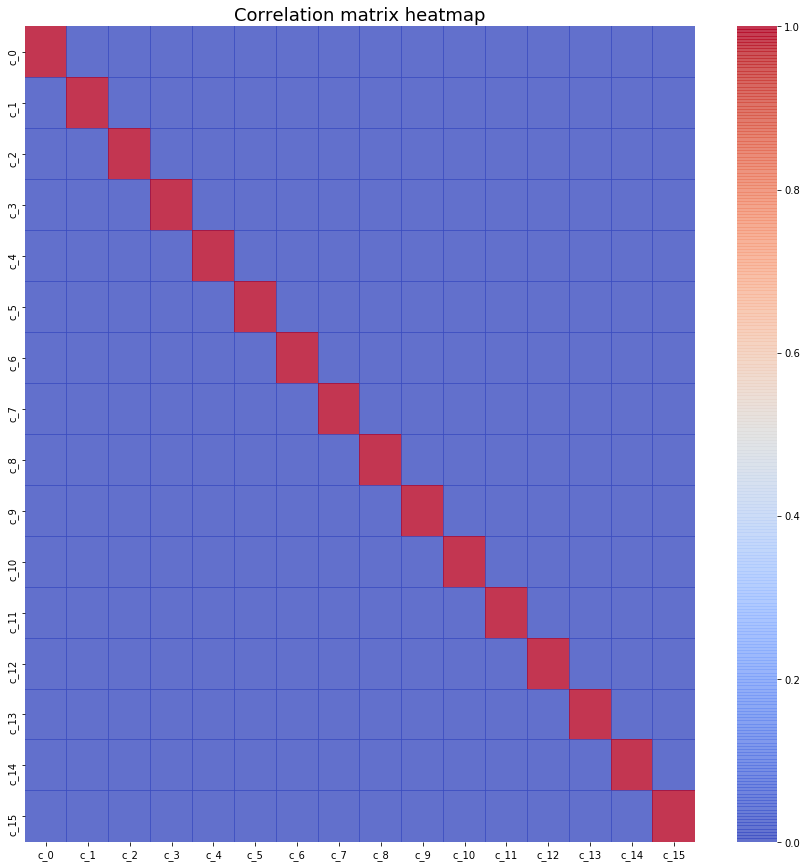

In [80]:
plt.figure(figsize=(15,15))
plt.title('Correlation matrix heatmap', fontsize=18)
sns.heatmap(reduced_azdias.corr(), vmin=0, vmax=1, cmap="coolwarm", alpha=0.8);

In [81]:
reduced_customers.to_pickle("reduced_customers.pkl")
reduced_azdias.to_pickle("reduced_azdias.pkl")

## 5- Clustering Analysis

Cluster analysis is an unsupervised technique widely used to classifies objects, on a set of user selected characteristics. The resulting clusters should exhibit high internal (within-cluster) homogeneity and high external (between-cluster) heterogeneity. In other words it is a group of multivariate techniques whose primary purpose is to group objects based on the characteristics they possess. It makes groupings on the basis of distance (squared distance). This distance is a key parameter in K-means clustering where it is used to choose the k value (number of cluster) and also to visualize it.

### K-means clustering

In this project, we’ll use the unsupervised clustering algorithm, k-means, to segment general population using their PCA attributes, which are in the transformed DataFrame we just created. Then we will use this model to create segments for customers dataset. The goal is to identify groups of indivduals taht have similar demographic characteristics.

K-means create clusters, regardless of the actual existence of any structure in the data. When using K-means clustering, we are making an hypothesis of some structure among the objects. We should always remember that just because clusters can be found does not validate their existence. Only with strong conceptual support and good visualization clusters could potentially be meaningful and relevant.

In [173]:
reduced_customers = pd.read_pickle("reduced_customers.pkl")
reduced_azdias = pd.read_pickle("reduced_azdias.pkl")

In [4]:
from sklearn.cluster import KMeans

In [175]:
reduced_azdias.shape

(891221, 16)

##### I. Determining the optimal number of clusters for k-means clustering

For each k value, we will initialise k-means and use the [inertia attribute](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)  to identify the sum of squared distances of samples to the nearest cluster centre.

In [7]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    print ('Training k={}...'.format(k))
    km = km.fit(reduced_azdias)
    Sum_of_squared_distances.append(km.inertia_)

Training k=1...
Training k=2...
Training k=3...
Training k=4...
Training k=5...
Training k=6...
Training k=7...
Training k=8...
Training k=9...
Training k=10...
Training k=11...
Training k=12...
Training k=13...
Training k=14...
Training k=15...


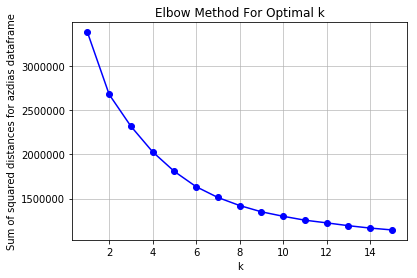

In [8]:
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances for azdias dataframe')
plt.title('Elbow Method For Optimal k')
plt.grid(alpha=0.8)
plt.show()

In the plot above the elbow is at k=6 indicating the optimal k for this dataset is 5 - 6.

##### II. Creating K-means model

In this section we use [k-means clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) module imported from scikitlearn library to fit and predict azdias dataset. Then we visualize the distribution of labels in the dataset (cluster counts) and finally we use the clustering model created previously to predict cluster labels of customers dataset.

In [176]:
km = KMeans(n_clusters=6, random_state=42)

In [177]:
km_azdias = km.fit(reduced_azdias)

In [180]:
# Save K-means model to use later

filename = 'kmeans_model.sav'
pickle.dump(km_azdias, open(filename, 'wb'))

In [178]:
reduced_azdias['Cluster'] = km.predict(reduced_azdias)

In [179]:
reduced_azdias.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,Cluster
LNR,,,,,,,,,,,,,,,,,
191653,-0.811452,-1.274087,-0.394624,0.536243,0.428978,-0.272256,0.208318,0.130107,-0.374549,-0.015164,0.270821,0.095470,-0.000859,-0.262082,-0.404160,0.106808,4
191654,0.960619,-0.571864,0.839011,0.640866,-0.092142,-0.276716,-0.760382,-0.531621,-0.061749,0.035263,0.296035,0.007392,-0.447308,-0.048724,0.348336,-0.129924,0
191655,0.602320,-0.515073,-0.789517,-1.173841,0.843082,0.350187,-0.202789,-0.055925,0.205694,-0.184959,-0.086090,0.004549,-0.003981,0.000419,0.043968,-0.089782,5
191656,0.620770,-0.971363,-0.495339,-1.141655,0.736106,0.328795,-0.043147,-0.088370,0.027789,0.033241,-0.113173,-0.093389,-0.031291,-0.025838,-0.114455,-0.026018,5
191657,-0.731002,-0.570668,1.017752,0.820290,0.650232,-0.135740,0.123390,-0.016908,0.129252,-0.194120,-0.274083,-0.483693,0.067230,-0.118644,0.129995,0.021845,4


###### III.  Predicting customers labels

In [129]:
cluster_counts_azdias = reduced_azdias['Cluster'].value_counts()
cluster_counts_azdias

1    186146
4    171959
0    157000
3    149223
2    135061
5     91832
Name: Cluster, dtype: int64

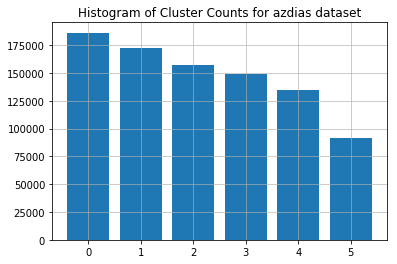

In [130]:
# another method of visualizing the distribution
# display a histogram of cluster counts
plt.grid(alpha=0.8)
plt.bar(range(len(cluster_counts_azdias)), cluster_counts_azdias.values)
plt.xticks(np.arange(0, max(km.labels_)+1, step=1))
title="Histogram of Cluster Counts for azdias dataset"
plt.title(title, fontsize=12)

plt.show()

Now we use our K-means model to predict cluster labels for customers dataset

In [131]:
reduced_customers['Cluster'] = km.predict(reduced_customers)

In [132]:
cluster_counts_customers = reduced_customers['Cluster'].value_counts()

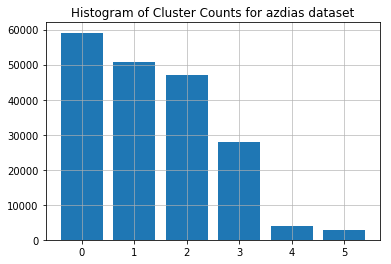

In [133]:
# another method of visualizing the distribution
# display a histogram of cluster counts
plt.grid(alpha=0.8)
plt.bar(range(len(cluster_counts_customers)), cluster_counts_customers.values)
plt.xticks(np.arange(0, max(km.labels_)+1, step=1))
title="Histogram of Cluster Counts for azdias dataset"
plt.title(title, fontsize=12)

plt.show()

##### IV. Visualization

Here below we have plotted a heatmap of the centroids and their location in the transformed feature space in azdias dataset. This representation gives us an insight into what characteristics define each cluster. It also allows us to see how each components are impacting each cluster. In the figure below we observe that the first four components have the most impact on clusters.

In the second part we have represented a 2D scatter plot of C_0 and C_1 components in azdias dataset. each point represent a data point and we can see that 4 clusters seperated with different colors and their centers in black.

Finally we have represneted a 3D projection by adding C_2 component (axis z). This 3D scatter plot gives us a good overview of clusters in the space. 

In [134]:
cluster_centroids = km.cluster_centers_

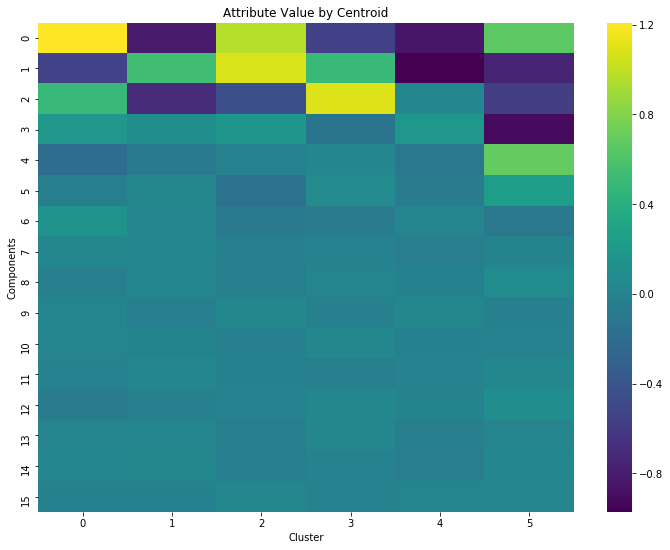

In [135]:
# generate a heatmap in component space, using the seaborn library
plt.figure(figsize = (12,9))
ax = sns.heatmap(cluster_centroids.T, cmap = 'viridis')
ax.set_xlabel("Clusters")
ax.set_ylabel("Components")
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
ax.set_title("Attribute Value by Centroid")
plt.show()

In [136]:
X = reduced_azdias.iloc[:,:-1].values
centers = cluster_centroids
labels = km.labels_

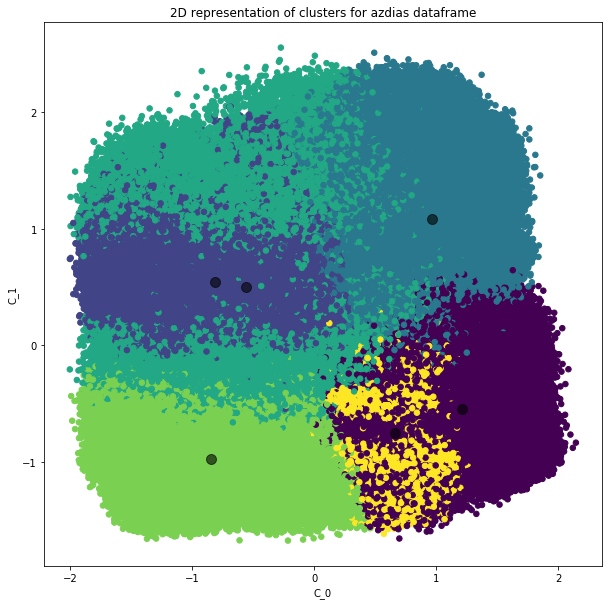

In [137]:
# 2D representation of clusters with centers for C_0 and C_1 components 
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.6)
plt.xlabel('C_0')
plt.ylabel('C_1')
plt.title('2D representation of clusters for azdias dataframe')
plt.show()

In [138]:
from mpl_toolkits.mplot3d import Axes3D

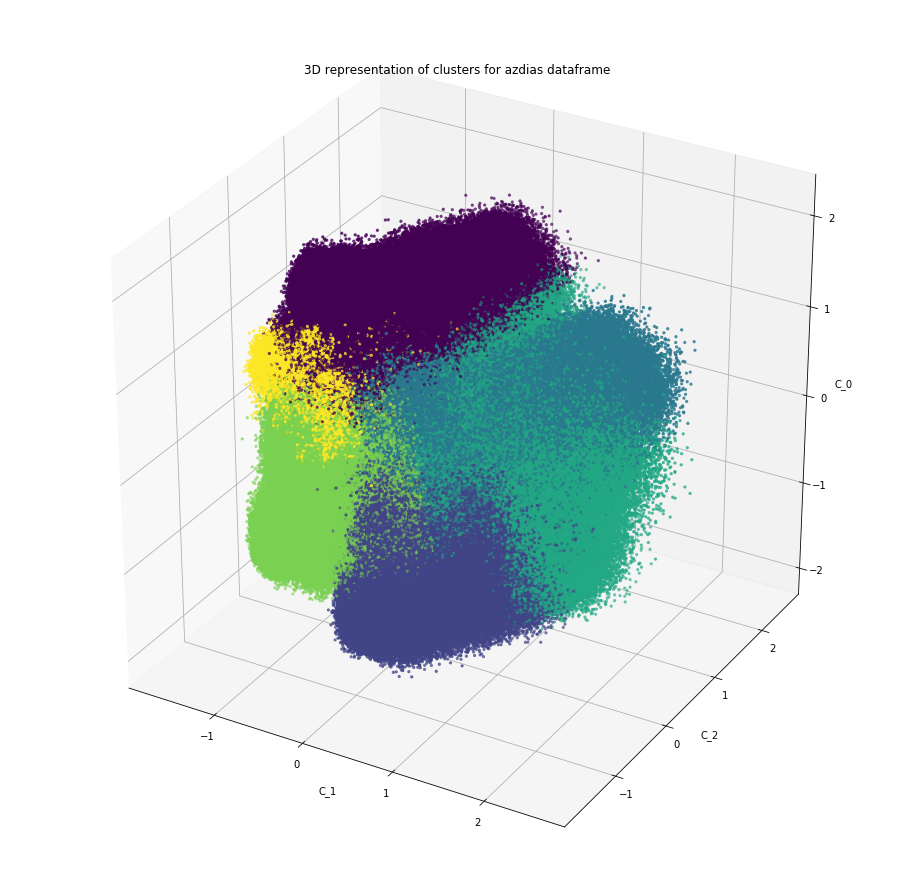

In [139]:
# 3D representation of clusters with centers for C_0, C_1 and C_2 components 
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],X[:,0], c=labels, s=5, cmap='viridis')
ax.set_xlabel('C_1')
ax.set_ylabel('C_2')
ax.set_zlabel('C_0')
plt.title('3D representation of clusters for azdias dataframe')
plt.show()

##### V. Natural groupings

In this section we want to look at groups of persons that are more likely to be in mail-order list. First we will concatenate D19_VERSAND_DATUM (**actuality of the last transaction for the segment mail-order TOTAL**) column from cleaned dataframe and Cluster labels column from reduced dataframe . Then we generate the distribution between clusters of the highest value of D19_VERSAND_DATUM column corresponding to the **highest activity within the last 12 months are grouped**. In other words we want to identify the cluster which has regrouped the highest number of population that are more likely to be in mail-order list campaign. All steps described previously are executed on azdias and customers dataframe and the percentage of the highest activity population in the cluster of interest is caluclated.

In [155]:
clean_customers = pd.read_pickle("cleaned_customers.pkl")
clean_azdias = pd.read_pickle("cleaned_azdias.pkl")

In [156]:
concat_azdias = pd.concat([clean_azdias[['D19_VERSAND_DATUM']], \
                reduced_azdias[['Cluster']]],axis=1)
concat_customers = pd.concat([clean_customers[['D19_VERSAND_DATUM']], \
                reduced_customers[['Cluster']]],axis=1)

In [157]:
# Highest activity within the last 12 months value AZDIAS
highest_azdias = df['D19_VERSAND_DATUM'].value_counts().index[-1]
# Highest activity within the last 12 months value CUSTOMERS
highest_customers = df2['D19_VERSAND_DATUM'].value_counts().index[-1]

In [158]:
# Distribution of the highest value of D19_VERSAND_DATUM between clusters
counts_azdias = concat_azdias[concat_azdias['D19_VERSAND_DATUM'].isin([highest_azdias])]['Cluster'].value_counts()
counts_customers = concat_customers[concat_customers['D19_VERSAND_DATUM'].isin([highest_customers])]['Cluster'].value_counts()

In [161]:
# Maximum count of D19_VERSAND_DATUM
max_count = max(concat_azdias[concat_azdias['D19_VERSAND_DATUM'].isin([highest_azdias])]['Cluster'].value_counts())
# Sum count of D19_VERSAND_DATUM
sum_count = sum(concat_azdias[concat_azdias['D19_VERSAND_DATUM'].isin([highest_azdias])]['Cluster'].value_counts())
# Percentage of population regrouped in specific cluster with highest activity within the last 12 months
percentage_grouped = np.round(max_count/sum_count,2)*100
# The cluster where the most population is regrouped
cluster_number = counts_azdias[counts_azdias==max(counts_azdias)].index[0]
print ('{}% of the indivduals of **actuality of the last transaction in D19_VERSAND_DATUM: the segment mail-order TOTAL** with the highest activity within the last 12 months are grouped in cluster number {} in azdias dataset.'.format(percentage_grouped,cluster_number))


59.0% of the indivduals of **actuality of the last transaction for the segment mail-order TOTAL** with the highest activity within the last 12 months are grouped in cluster number 3.


In [162]:
# Maximum count of D19_VERSAND_DATUM
max_count = max(concat_customers[concat_customers['D19_VERSAND_DATUM'].isin([highest_customers])]['Cluster'].value_counts())
# Sum count of D19_VERSAND_DATUM
sum_count = sum(concat_customers[concat_customers['D19_VERSAND_DATUM'].isin([highest_customers])]['Cluster'].value_counts())
# Percentage of population regrouped in specific cluster with highest activity within the last 12 months
percentage_grouped = np.round(max_count/sum_count,2)*100
# The cluster where the most population is regrouped
cluster_number = counts_customers[counts_customers==max(counts_customers)].index[0]
print ('{}% of the indivduals of **actuality of the last transaction in D19_VERSAND_DATUM: the segment mail-order TOTAL** with the highest activity within the last 12 months are grouped in cluster number {} in customers dataset.'.format(percentage_grouped,cluster_number))


81.0% of the indivduals of **actuality of the last transaction for the segment mail-order TOTAL** with the highest activity within the last 12 months are grouped in cluster number 3.


## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [163]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [165]:
mailout_train['RESPONSE'].value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')